In [1]:
import numpy as np 
from parameters import *
from functions import *
import pickle
import matplotlib.pyplot as plt

In [2]:
Qmax = 1.5
Qdim = 500
qlist  = np.linspace(Qmax/Qdim, Qmax, Qdim)
dlist = [0.5, 1, 2, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 80, 100]
EWs_list = []
EVs_list = []
abs_1s_list = []
abs_2s_list = []

In [3]:
for d in dlist:
    with open(r"results/wellwidths/Qmax={}_Qdim={}_d={}_exciton_EWs.pickle".format(Qmax, Qdim,float(d)), 'rb') as output_file:
        EWs_list.append(pickle.load(output_file))
    with open(r"results/wellwidths/Qmax={}_Qdim={}_d={}_exciton_EVs.pickle".format(Qmax, Qdim,float(d)), 'rb') as output_file:
        EVs_list.append(pickle.load(output_file))
    #with open(r"results/wellwidths/Qmax={}_Qdim={}_d={}_exciton_absorption_1s.pickle".format(Qmax, Qdim,d), 'rb') as output_file:
     #   abs_1s_list.append(pickle.load(output_file))
    #with open(r"results/wellwidths/Qmax={}_Qdim={}_d={}_exciton_absorption_2s.pickle".format(Qmax, Qdim,d), 'rb') as output_file:
    #    abs_2s_list.append(pickle.load(output_file))

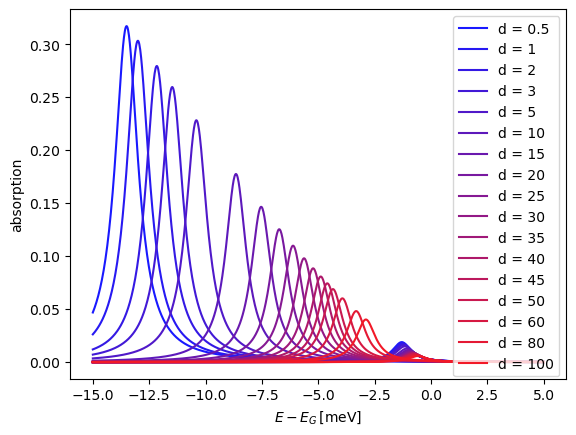

In [4]:
energyresolution = 1000
E_start = -0.015 #+ 0.012903883497007542 * hbar
E_stop = 0.005  #+ 0.012903883497007542 * hbar
omega_list = np.linspace(E_start/hbar,E_stop/hbar,energyresolution)
from matplotlib.colors import to_rgb
import colorsys
import matplotlib as mpl
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

# Funktion zum Reduzieren der Sättigung
def desaturate_color(color, factor=0.9):
    # Konvertiere die Farbe in den RGB-Farbraum
    r, g, b = to_rgb(color)
    # Konvertiere die Farbe in den HSV-Farbraum
    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    # Reduziere die Sättigung
    s *= factor
    # Konvertiere die Farbe zurück in den RGB-Farbraum
    desaturated_color = colorsys.hsv_to_rgb(h, s, v)
    return desaturated_color

lowred = desaturate_color('red')
lowblue = desaturate_color('blue')
E_1s_list = []
E_2s_list = []
abs_1s_list = []
abs_2s_list = []
for i in range(len(dlist)):
    
    E_R_0 = E_R_mu(EWs_list[i],EVs_list[i], 0, omega_0, n_ref, omega_list, d_cv, gamma, qlist)
    abs_1s = get_absorption(E_R_0, energyresolution)
    E_1s_list.append(np.argmax(abs_1s))
    abs_1s_list.append(max(abs_1s))

    E_R_1 = E_R_mu(EWs_list[i],EVs_list[i], 1, omega_0, n_ref, omega_list, d_cv, gamma, qlist)
    abs_2s = get_absorption(E_R_1, energyresolution)
    E_2s_list.append(np.argmax(abs_2s))
    abs_2s_list.append(max(abs_2s))
    
    plt.plot(omega_list*hbar*1000, abs_1s,color = colorFader(lowblue,lowred,i/len(dlist)), label = 'd = {}'.format(dlist[i]))

    plt.plot(hbar*omega_list*1000,abs_2s,color = colorFader(lowblue,lowred,i/len(dlist)))

plt.xlabel(r"$E-E_G\,$[meV]")
plt.ylabel('absorption')
plt.legend()
#plt.savefig('alpha_comparison_excitons.pdf',bbox_inches = 'tight')
plt.show()


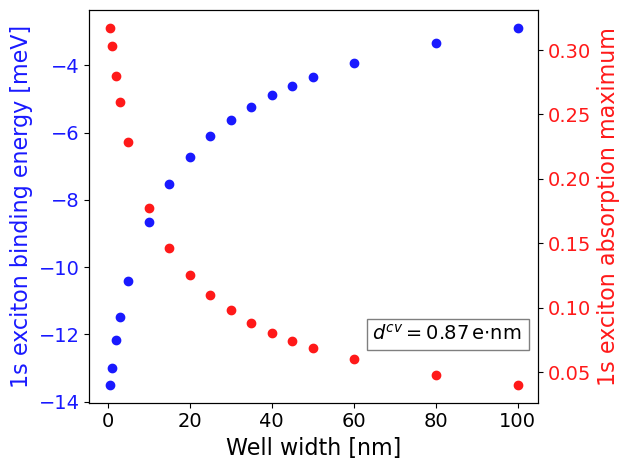

In [13]:
lowred = desaturate_color('red',factor = 0.9)
lowblue = desaturate_color('blue', factor = 0.9)
# Assuming dlist, omega_list, E_1s_list, hbar, and abs_1s_list are defined
fig, ax1 = plt.subplots()

# Plot E_1s on the primary y-axis
for i in range(len(dlist)):
    if i == 0:
        ax1.scatter(dlist[i], omega_list[E_1s_list[i]] * hbar * 1000, color=lowblue, label=r"$E_{1s}$")
    else:
        ax1.scatter(dlist[i], omega_list[E_1s_list[i]] * hbar * 1000, color=lowblue)

ax1.set_xlabel('Well width [nm]', fontsize = 16)
ax1.set_ylabel(r"1s exciton binding energy [meV]", color=lowblue, fontsize = 16)
ax1.tick_params(axis='y', labelcolor=lowblue, labelsize = 14)
ax1.tick_params(axis='x', labelsize = 14)

# Create a secondary y-axis for max(alpha_1s)
ax2 = ax1.twinx()
for i in range(len(dlist)):
    if i == 0:
        ax2.scatter(dlist[i], abs_1s_list[i], color=lowred, label=r"max($\alpha_{1s}$)")
    else:
        ax2.scatter(dlist[i], abs_1s_list[i], color=lowred)

ax2.set_ylabel(r"1s exciton absorption maximum", color=lowred, fontsize = 16)
ax2.tick_params(axis='y', labelcolor=lowred, labelsize = 14)
textstr = r"$d^{cv} = 0.87\,$e$\cdot$nm "
props = dict(facecolor='white', alpha=0.5)
ax2.text(0.63, 0.2, textstr, transform=ax2.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
# Add legends for clarity
fig.tight_layout()  # Adjust layout to prevent overlap
#fig.legend(bbox_to_anchor=(0.9, 0.9))
plt.savefig('1s_dependence_d.pdf',bbox_inches = 'tight')
plt.show()

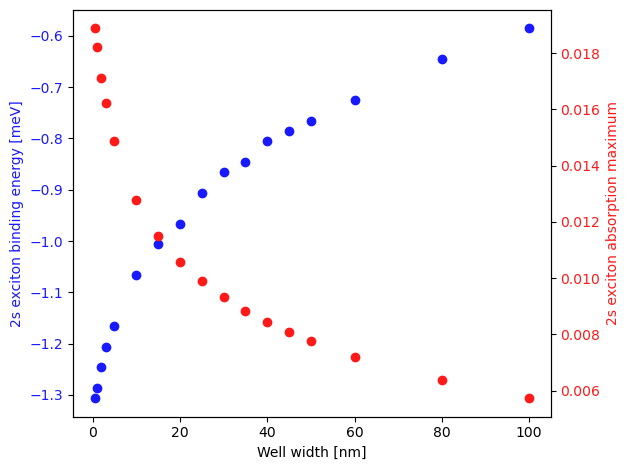

In [ ]:
# Assuming dlist, omega_list, E_1s_list, hbar, and abs_1s_list are defined
fig, ax1 = plt.subplots()

# Plot E_1s on the primary y-axis
for i in range(len(dlist)):
    if i == 0:
        ax1.scatter(dlist[i], omega_list[E_2s_list[i]] * hbar * 1000, color=lowblue, label=r"$E_{2s}$")
    else:
        ax1.scatter(dlist[i], omega_list[E_2s_list[i]] * hbar * 1000, color=lowblue)

ax1.set_xlabel('Well width [nm]')
ax1.set_ylabel(r"2s exciton binding energy [meV]", color=lowblue)
ax1.tick_params(axis='y', labelcolor=lowblue)

# Create a secondary y-axis for max(alpha_1s)
ax2 = ax1.twinx()
for i in range(len(dlist)):
    if i == 0:
        ax2.scatter(dlist[i], abs_2s_list[i], color=lowred, label=r"max($\alpha_{2s}$)")
    else:
        ax2.scatter(dlist[i], abs_2s_list[i], color=lowred)

ax2.set_ylabel(r"2s exciton absorption maximum", color=lowred)
ax2.tick_params(axis='y', labelcolor=lowred)
#textstr = r"$d^{cv} = 0.87$ "
#props = dict(facecolor='white', alpha=0.5)
#ax2.text(0.77, 0.2, textstr, transform=ax2.transAxes, fontsize=14,
       # verticalalignment='top', bbox=props)
# Add legends for clarity
fig.tight_layout()  # Adjust layout to prevent overlap
#fig.legend(bbox_to_anchor=(0.9, 0.9))
plt.savefig('2s_dependence_d.pdf',bbox_inches = 'tight')
plt.show()